In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('data1.csv')

In [3]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
cols=['id','thickness','ucsize','ucshape','adhesion','secs','nuclei','chromatin','nucleoli','mitoses','class']

In [5]:
len(cols)

11

### # Adding column to my dataframe

In [6]:
df.loc[-1]=cols
df.index = df.index + 1  # shifting index
df = df.sort_index()  # sorting by index
temp=df.columns
df.columns=df.iloc[0]
df.iloc[0]=temp


In [7]:
df.head()

,id,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Dropping 'id' column as it really doesn't matter for our prediction

In [8]:
df.drop('id',axis=1,inplace=True)

In [9]:
df.head()

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
len(df)

699

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   thickness  699 non-null    object
 1   ucsize     699 non-null    object
 2   ucshape    699 non-null    object
 3   adhesion   699 non-null    object
 4   secs       699 non-null    object
 5   nuclei     699 non-null    object
 6   chromatin  699 non-null    object
 7   nucleoli   699 non-null    object
 8   mitoses    699 non-null    object
 9   class      699 non-null    object
dtypes: object(10)
memory usage: 60.1+ KB


## Checking for missing values

In [12]:
for i in range(len(df.columns)):
    print(f'{df.columns[i]} = {len(df[df[df.columns[i]].isnull()])}')
#len(df[df['id'].isnull()])

thickness = 0
ucsize = 0
ucshape = 0
adhesion = 0
secs = 0
nuclei = 0
chromatin = 0
nucleoli = 0
mitoses = 0
class = 0


## Missing vals are denoted by '?' according to the dataset information.

In [13]:
df[df.values=='?']

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [14]:
len(df[df.values=='?'])

16

In [15]:
df['nuclei']=df['nuclei'].replace('?','NaN')

## Changing df cols with string vals to int vals

In [16]:
for i in range(1,len(df.columns)):
    df[df.columns[i]]=df[df.columns[i]].astype(float)

In [17]:
df.head()

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,5,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,2.1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [18]:
df.iloc[[23,40,139]]

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
23,8,4.0,5.0,1.0,2.0,NaN,7.0,3.0,1.0,4.0
40,6,6.0,6.0,9.0,6.0,NaN,7.0,8.0,1.0,2.0
139,1,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,2.0


In [19]:
df['nuclei'].mean()

3.545095168374817

In [20]:
df.iloc[[23,40,139]]['nuclei']

23    NaN
40    NaN
139   NaN
Name: nuclei, dtype: float64

In [21]:
df[df['nuclei'].isnull()]

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
23,8,4.0,5.0,1.0,2.0,NaN,7.0,3.0,1.0,4.0
40,6,6.0,6.0,9.0,6.0,NaN,7.0,8.0,1.0,2.0
139,1,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,2.0
145,1,1.0,3.0,1.0,2.0,NaN,2.0,1.0,1.0,2.0
158,1,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0
164,5,1.0,1.0,1.0,2.0,NaN,3.0,1.0,1.0,2.0
235,3,1.0,4.0,1.0,2.0,NaN,3.0,1.0,1.0,2.0
249,3,1.0,1.0,1.0,2.0,NaN,3.0,1.0,1.0,2.0
275,3,1.0,3.0,1.0,2.0,NaN,2.0,1.0,1.0,2.0
292,8,8.0,8.0,1.0,2.0,NaN,6.0,10.0,1.0,4.0


## Replacing null values with mean of the column

In [22]:
mean_to_fill=df['nuclei'].mean()

In [23]:
df['nuclei'].fillna(value=mean_to_fill,inplace=True)

In [24]:
df.head()

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,5,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,2.1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [25]:
df[df['nuclei'].isnull()]

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class


## So now no more null values exist

In [26]:
df['class'].value_counts()

2.0    457
4.0    241
2.1      1
Name: class, dtype: int64

### # Convert the single  2.1 value in class column to 2.

In [27]:
df[df['class']==2.1]

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,5,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,2.1


In [28]:
df.iloc[0,9]=2.0

In [29]:
df['class'].value_counts()

2.0    458
4.0    241
Name: class, dtype: int64

## Lets  convert the class column to 0 and 1 as we will be using sigmoid function for classification

In [30]:
df.head(20)

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,5,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,2.0
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
5,8,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0
6,1,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
7,2,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
8,2,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0
9,4,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [31]:
df['class'].replace([2.0,4.0],[0,1],inplace=True)

In [32]:
df.head()

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,5,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,0.0
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


## Model Building

In [33]:
class Logistic_Reg():
    def __init__(self,lr=0.01,n_iters=15,plot=False):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None
        self.plot=plot

    def fit(self, X, y):
        #print(f'X = {X.shape}')
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #print(f'X = {X.shape}, w = {self.weights.shape}')
        # gradient descent
        loss=[]
        epochs=[]
        n=0
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            X=X.astype(int)
            #print('X = ',X)
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)
            
            #append loss and epochs for plotting learning curves
            loss.append(self.compute_loss(y,y_predicted))
            epochs.append(n)
            n+=1
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
        # plot the learning curve  
        if(self.plot==True):  
            self.plot_loss(loss,epochs)
        
        return self.weights,self.bias
    
    def fit_with_reg(self,X,y,ridge=0.01):
        #print(f'shape = {X.shape}')
        #print(f'dim = {X.ndim}')
        
        if(X.ndim==1):
            n_samples=X.shape[0]
            n_features=1
            X=np.expand_dims(X,axis=1)
        else:    
            n_samples,n_features = X.shape
        
        #initialize params. There will be a weight var for each feature
        #self.weights = np.zeros(n_features)
        self.weights=np.random.normal(size=(n_features))
        #print(f'we = ',self.weights)
        self.bias = 0
        
        # gradient descent
        #print(f"Values before gd = ")
        #print(f'm = {self.weights} , b = {self.bias}')
        
        #print(f"Values during gd = ")
        for _ in range(self.n_iters):
            X=X.astype(int)
            y_pred = np.dot(X,self.weights)+self.bias
            
            # compute gradients
            dw=(1/n_samples)*(np.dot((X.T),(y_pred-y)))
            db=(1/n_samples)*(np.sum(y_pred-y))
            
            # adding regularization values
            dw=dw+(2*ridge*self.weights)

            # update params
            self.weights = self.weights - self.lr*(dw)
            self.bias = self.bias - self.lr*(db)
            #print(f"w shape = ",{self.weights.shape})
            
            #print(f'm = {self.weights} , b = {self.bias}')
        return (self.weights,self.bias)
    
    def compute_loss(self, y_true, y_pred):
    # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)
    
    def plot_loss(self,loss,epochs):
        plt.xlabel('Num of epochs')
        plt.ylabel('Loss function')
        plt.plot(loss,epochs)
        

    def predict(self, X):
        X=X.astype(int)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    # This will make prediction when we provide it Weights and bias explicitly
    def predict2(self,X,W,b):
        X=X.astype(int)
        linear_model = np.dot(X, W) + b
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
        

    def _sigmoid(self, x):
        sig=1 / (1 + np.exp(-x))
        return sig
    
    def accuracy(self,y,y_hat):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y,y_hat)

## Splitting data into training and testing

In [34]:
df.head()

,thickness,ucsize,ucshape,adhesion,secs,nuclei,chromatin,nucleoli,mitoses,class
0,5,1.0,1.1,1.2,2.0,1.3,3.0,1.4,1.5,0.0
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


In [35]:
len(df)

699

In [36]:
# 80 percent of 699 is
int((699*80)/100)

559

In [37]:
df_train,df_test=df[:559],df[559:]

In [38]:
X_train,X_test,y_train,y_test=df_train.iloc[:,:-1],df_test.iloc[:,:-1],df_train['class'],df_test['class']

In [39]:
len(X_train),len(X_test),len(y_train),len(y_test)

(559, 140, 559, 140)

In [40]:
#df.iloc[:,:-1]

In [41]:
#X_train.head()

## Using model for prediction on whole  dataset

In [42]:
X,y=df.iloc[:,:-1],df['class']

In [43]:
X.shape

(699, 9)

In [44]:
lr=Logistic_Reg(n_iters=100,plot=True)

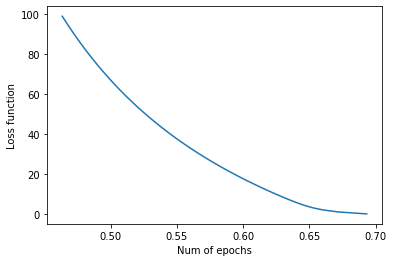

In [45]:
w,b=lr.fit(X,y)

In [46]:
mypred=lr.predict(X)

In [47]:
mypred[20:150]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

## Accuracy on our training data is = 

In [48]:
lr.accuracy(y,mypred)

0.8812589413447782

## Training loss function value = 

In [49]:
lr.compute_loss(y,mypred)

2.4607025233913475

### Missclassification error = (FP + FN)/Number of samples

In [50]:
(confusion_matrix(y,mypred)[0,1]+confusion_matrix(y,mypred)[1,0])/len(X)

0.11874105865522175

## Prediction on test data

In [51]:
test_pred=lr.predict(X_test)

### Missclassification error on test set

In [52]:
(confusion_matrix(y_test,test_pred)[0,1]+confusion_matrix(y_test,test_pred)[1,0])/len(X_test)

0.03571428571428571

## Cross Validation for learning rate  paramater

In [53]:
rates=[0.001,0.05,0.01,0.5,0.1]
acc_list=[]

In [54]:
for i in rates:
    lr=Logistic_Reg(lr=i,n_iters=100)
    lr.fit(X_train,y_train)
    t_pred=lr.predict(X_test)
    acc_list.append(lr.accuracy(y_test,t_pred))

In [55]:
acc_list

[0.25, 0.9642857142857143, 0.95, 0.9785714285714285, 0.9714285714285714]

### Applying regularization

In [56]:
reg=[0.000567,0.000001,0.0001,0.001,0.05,0.01,0.1,1]
acc_list=[]
weights=[]
for i in reg:
    lr=Logistic_Reg(n_iters=100)
    weights.append(lr.fit_with_reg(X_train,y_train,ridge=i))
    t_pred=lr.predict(X_test)
    acc_list.append(lr.accuracy(y_test,t_pred))


In [57]:
acc_list

[0.2785714285714286,
 0.5428571428571428,
 0.3142857142857143,
 0.45714285714285713,
 0.25,
 0.4714285714285714,
 0.35,
 0.25]

In [58]:
# So in our case the best possible val of alpha is 0.000001
reg_pred = lr.predict2(X_test,weights[1][0],weights[1][1])
print(f'missclassification = {(confusion_matrix(y_test,reg_pred)[0,1]+confusion_matrix(y_test,reg_pred)[1,0])/len(X_test)}')

# so missclassification is greater

missclassification = 0.45714285714285713


## Using sklearn toolkit

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
sc=StandardScaler()
lr=LogisticRegression()

In [61]:
X=df.iloc[:,:-1]

In [62]:
y=df['class']

In [63]:
X=sc.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
lr.fit(X_train,y_train)

LogisticRegression()

In [71]:
pred_train=lr.predict(X_train)

In [72]:
accuracy_score(y_train,pred_train)

0.9693251533742331

In [66]:
pred=lr.predict(X_test)

In [67]:
accuracy_score(y_test,pred)
# Using sklearn I got 96% accuracy

0.9619047619047619

In [68]:
confusion_matrix(y_test,pred)

array([[141,   2],
       [  6,  61]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       143
         1.0       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210

